In [5]:
#importer ls librairies nécessaires
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, jaccard_score

In [2]:
#Charger les données iris
iris = load_iris()
X_train_iris = iris.data
Y_train_iris = iris.target

In [6]:
# définition le nombre de groupes (K)
k = 3

In [7]:
# entrainement le modèle de k-Means sur les données
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_train_iris)

C:\Users\hamza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [8]:
# prédire les groupes pour chaque point de données
Y_P = kmeans.predict(X_train_iris)

In [9]:
# calculer la matrice de confusion
cconfusion_matrix = confusion_matrix(Y_train_iris, Y_P)
print(confusion_matrix)

<function confusion_matrix at 0x000001C251E3F420>


In [10]:
# calculer la précision en utilisant l'indice de Jaccard
jaccard = jaccard_score(Y_train_iris, Y_P, average='macro')
print(f"Indice de Jaccard: {jaccard}")

Indice de Jaccard: 0.23076923076923075


C:\Users\hamza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hamza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hamza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

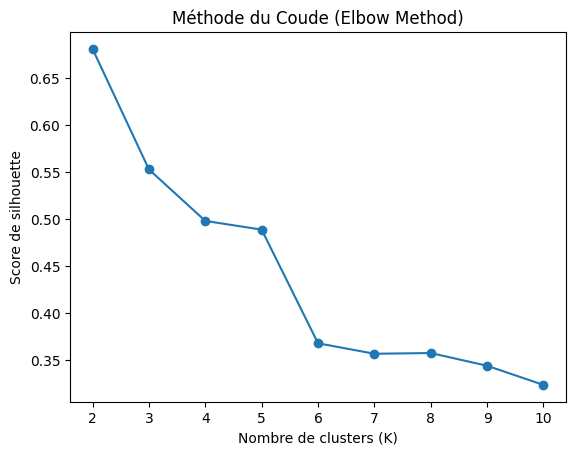

In [11]:
#Détermination de la valeur optimale de k
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Liste pour stocker les scores de silhouette
silhouette_scores = []

# Essayer différentes valeurs de K
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train_iris)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_train_iris, labels)
    silhouette_scores.append(silhouette_avg)

# Tracé du graphique du score de silhouette en fonction de K
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Méthode du Coude (Elbow Method)')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Score de silhouette')
plt.show()